## Problem Statement
Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'/content/wine.csv')

## EDA 

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Correlation, Skewness & Kurtosis

In [7]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


## Analysis
#### Type has a postive correlation with Malic, Alcalinity, Color and a  Negative Correlation with Alcohol, Magnesium, Phenols, Flavanoids, Proanthocyanins, Hue, Dilution, Proline and no relation with Ash
#### Alcohol has a postive correlation with Proline,Color, Flavanoids, Nonflavanoids, Phenols, Magnesium & Ash and a  Negative Correlation with Type, Alcalinity, Phenols, Flavanoids, Proanthocyanins and no relation with Dilution, Hue, Malic
#### Malic has a postive correlation with Type, Ash, Alcalinity, Nonflavanoids, Color, Proline and a  Negative Correlation with Phenols, Flavanoids, Proanthocyanins, Hue, Dilution, Proline and no relation with Alcohol, Magnesium
#### Ash has a postive correlation with Alcohol, Malic, Alcalinity, Magnesium, Nonflavanoids, Phenols, Flavanoids, Color, Proline, No Negative Correlation and no relation with Proanthocyanins, Hue, Type
#### Alcalinity has a postive correlation with Type, Malic, Ash, Nonflavanoids and a  Negative Correlation with  Alcohol, Phenols, Flavanoids, Proanthocyanins,Hue, Dilution & Proline and no relation with Magnesium.
#### Magnesium has a postive correlation with Alcohol, Ash, Phenols, Flavanoids, Proanthocyanins, Color & Proline and a  Negative Correlation with Type, Nonflavanoids and no relation with Malic, Alcalinity, Hue, Dilution.
#### Phenols has a postive correlation with Alcohol, Ash, Magnesium, Flavanoids, Proanthocyanins, Hue, Dilution, Proline and a Negative correlation with Type, Malic, Alcalinity, Nonflavanoids, and no relationship with Color
#### Flavanoids has a positive correlation with Alcohol, Ash, Magnesium, Phenols, Proanthocyanins, Hue, Dilution and Proline and a Negative Correlation with type, Malic, Nonflavanoids & color.
#### Nonflavanoids has a postive correlation with Type, Malic, Ash, Alcalinity, Color and has a negative correlation with Alcohol, Magnesium, Phenols, Flavanoids, Proanthocyanins, Hue, Dilution, Proline

#### Proanthocyanins has a positive correlation with phenols, Flavanoids, Hue, Dilution, Proline and Negative correlation with Type, Malic, Alcalinity, Nonflavanoids and No Correlation with Ash, Color
####  Color has positive correlation with Type, Alcohol, Malic, Ash, Magnesium, Nonflavanoids & Proline and Negative Correlation with Magnesium,  Hue, Dilution and No Correlation with Alcalinity, Phenols & Proanthocyanins

In [8]:
df.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

In [9]:
df.kurtosis()

Type              -1.322787
Alcohol           -0.852500
Malic              0.299207
Ash                1.143978
Alcalinity         0.487942
Magnesium          2.104991
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins    0.554649
Color              0.381522
Hue               -0.344096
Dilution          -1.086435
Proline           -0.248403
dtype: float64

#### Type has a Positive Skewness and Negative Kurtosis
#### Alcohol has Negative Skewness and Kurtosis
#### Malic has Positive Skewness and Kurtosis
#### Ash has Negative Skewness and Positive Kurtosis
#### Alcalinity has Positive skewness and Kurtosis
#### Magnesium has Positive Skewness and Kurtosis
#### Phenols has Positive Skewness and Kurtosis
#### Flavanoids has no skewness and Negative Kurtosis
#### Nonflavanoids has Positive skewness and Negative Kurtosis
#### Proanthocyanins has Positive skewness and Kurtosis
#### Nonflavanoids has Positive skewness and Negative Kurtosis
#### Proanthocyanins has Positive Skewness and Kurtosis
#### Color has Positive skewness and Kurtosis
#### Hue has no skewness and Negative Kurtosis
#### Dilution has Negative skewness and Kurtosis
#### Proline  has positive skewness and Negative Kurtosis

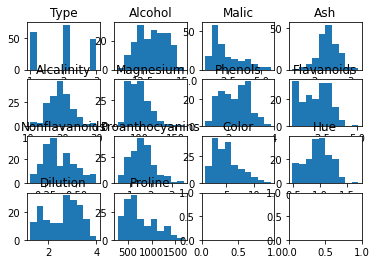

<Figure size 432x288 with 0 Axes>

In [10]:
fig, a = plt.subplots(4,4)
a[0][0].hist('Type', data = df)
a[0][0].set_title('Type')
a[0][1].hist('Alcohol', data= df)
a[0][1].set_title('Alcohol')
a[0][2].hist('Malic', data= df)
a[0][2].set_title('Malic')
a[0][3].hist('Ash', data= df)
a[0][3].set_title('Ash')
a[1][0].hist('Alcalinity', data= df)
a[1][0].set_title('Alcalinity')
a[1][1].hist('Magnesium', data= df)
a[1][1].set_title('Magnesium')
a[1][2].hist('Phenols', data = df)
a[1][2].set_title('Phenols')
a[1][3].hist('Flavanoids', data = df)
a[1][3].set_title('Flavanoids')
a[2][0].hist('Nonflavanoids', data = df) 
a[2][0].set_title('Nonflavanoids')
a[2][1].hist('Proanthocyanins', data = df)
a[2][1].set_title('Proanthocyanins')
a[2][2].hist('Color', data = df)
a[2][2].set_title('Color')
a[2][3].hist('Hue', data = df)
a[2][3].set_title('Hue')
a[3][0].hist('Dilution', data = df)
a[3][0].set_title('Dilution')
a[3][1].hist('Proline', data = df)
a[3][1].set_title('Proline')
plt.show()
plt.tight_layout()

In [11]:
# Checking for Missing Values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

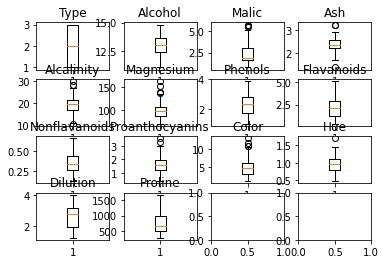

<Figure size 432x288 with 0 Axes>

In [12]:
fig, a = plt.subplots(4,4)
a[0][0].boxplot('Type', data = df)
a[0][0].set_title('Type')
a[0][1].boxplot('Alcohol', data= df)
a[0][1].set_title('Alcohol')
a[0][2].boxplot('Malic', data= df)
a[0][2].set_title('Malic')
a[0][3].boxplot('Ash', data= df)
a[0][3].set_title('Ash')
a[1][0].boxplot('Alcalinity', data= df)
a[1][0].set_title('Alcalinity')
a[1][1].boxplot('Magnesium', data= df)
a[1][1].set_title('Magnesium')
a[1][2].boxplot('Phenols', data = df)
a[1][2].set_title('Phenols')
a[1][3].boxplot('Flavanoids', data = df)
a[1][3].set_title('Flavanoids')
a[2][0].boxplot('Nonflavanoids', data = df) 
a[2][0].set_title('Nonflavanoids')
a[2][1].boxplot('Proanthocyanins', data = df)
a[2][1].set_title('Proanthocyanins')
a[2][2].boxplot('Color', data = df)
a[2][2].set_title('Color')
a[2][3].boxplot('Hue', data = df)
a[2][3].set_title('Hue')
a[3][0].boxplot('Dilution', data = df)
a[3][0].set_title('Dilution')
a[3][1].boxplot('Proline', data = df)
a[3][1].set_title('Proline')
plt.show()
plt.tight_layout()

#### Malic has Outliers on the upper Quartile
#### Ash has outliers in the upper Quartile
#### Alcalinity has outliers in the upper Quartile and Lower Quartile
#### Magnesium has outliers in the upper Quartile
#### Proanthocyanins has outliers in the upper Quartile


In [13]:
# Normalizing the data
from sklearn.preprocessing import Normalizer

In [14]:
norm = Normalizer()

In [15]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [16]:
df_norm = norm.fit_transform(df[['Type','Alcohol', 'Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']])

In [17]:
df_norm

array([[9.32148040e-04, 1.32644666e-02, 1.59397315e-03, ...,
        9.69433961e-04, 3.65402032e-03, 9.92737662e-01],
       [9.47939004e-04, 1.25127948e-02, 1.68733143e-03, ...,
        9.95335954e-04, 3.22299261e-03, 9.95335954e-01],
       [8.40654226e-04, 1.10630096e-02, 1.98394397e-03, ...,
        8.65873852e-04, 2.66487390e-03, 9.96175257e-01],
       ...,
       [3.55447904e-03, 1.57226456e-02, 5.07105676e-03, ...,
        6.99047544e-04, 1.84832910e-03, 9.89329998e-01],
       [3.53384139e-03, 1.55135637e-02, 3.05088307e-03, ...,
        7.06768278e-04, 1.90827435e-03, 9.89475589e-01],
       [5.27254850e-03, 2.48337034e-02, 7.20581628e-03, ...,
        1.07208486e-03, 2.81202587e-03, 9.84209053e-01]])

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from collections import Counter

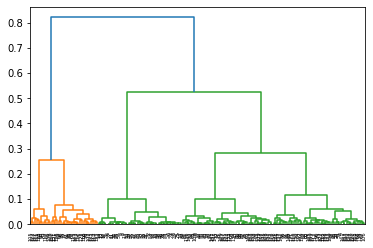

In [21]:
# create dendrogram using method as ward
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [22]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2

In [23]:
unique_colour = set(dendrogram['color_list'])
unique_colour

{'C0', 'C1', 'C2'}

In [24]:
optimal_number = len(unique_colour)-1

In [25]:
hc = AgglomerativeClustering(n_clusters=optimal_number, affinity = 'euclidean', linkage = 'ward')

In [26]:
y_hc = hc.fit_predict(df_norm)

In [27]:
df['ward_cluster'] = y_hc

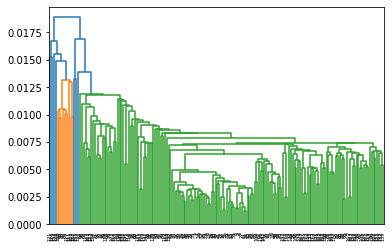

In [28]:
# create dendrogram using method as complete
dendrogram2 = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [29]:
unique_colour = set(dendrogram['color_list'])
unique_colour

{'C0', 'C1', 'C2'}

In [30]:
df['ward_cluster'].value_counts()

0    142
1     36
Name: ward_cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


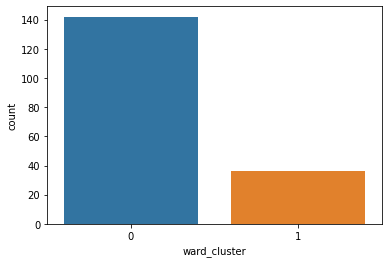

In [31]:
sns.countplot(df['ward_cluster'])

In [32]:
scaled = MinMaxScaler()

In [33]:
df_scaled = scaled.fit_transform(df[['Type','Alcohol', 'Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']])

In [34]:
#Checking the optimum No. of Clusters using Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

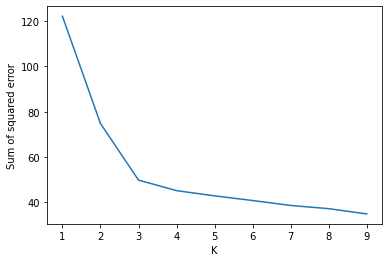

In [35]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [36]:
#Predicting the Clusters
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df_scaled)

In [37]:
df['Km_cluster']=y_pred

In [38]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ward_cluster,Km_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,1


In [39]:
df['Km_cluster'].value_counts()

0    69
2    60
1    49
Name: Km_cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


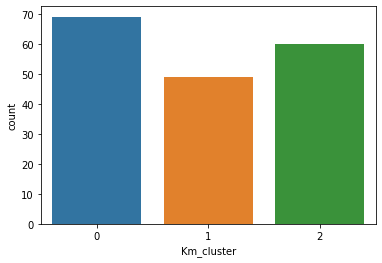

In [40]:
sns.countplot(df['Km_cluster'])

In [43]:
pca = PCA(0.95)

In [44]:
from sklearn.preprocessing import scale 

In [46]:
X_scaler = scale(df)

In [47]:
X_pca = pca.fit_transform(X_scaler)

In [48]:
X_pca

array([[ 3.86733269, -1.09019249,  0.11292464, ...,  0.01653548,
         1.07027671, -0.41019592],
       [ 2.7735478 , -0.06192689, -2.14036904, ..., -1.01015203,
        -0.1013301 , -0.12014888],
       [ 3.10586145, -0.84425079,  1.01784671, ..., -0.01646124,
        -0.77745342, -0.85419286],
       ...,
       [-2.59106028, -3.09773561, -0.31785256, ..., -0.03600339,
        -0.08585606,  0.40656693],
       [-2.37800354, -2.65562958, -0.13790773, ..., -0.44779385,
         0.4393209 , -0.09466331],
       [-3.05035902, -3.12125562,  1.36053324, ...,  0.49291626,
         0.3919036 ,  0.33154585]])

In [50]:
var = pca.explained_variance_ratio_

In [ ]:
pca.components_

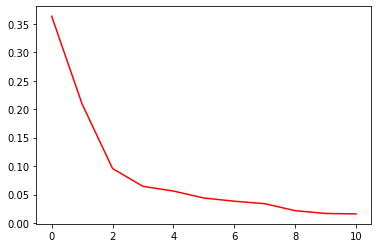

In [53]:
# Variance plot for PCA components obtained 
plt.plot(var,color="red")

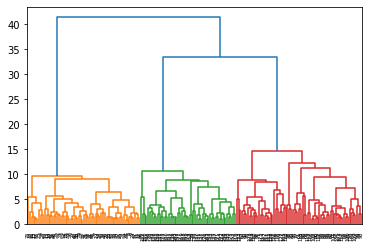

In [54]:
# Forming a dendogram with PCA Data
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))

In [55]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3

In [56]:
unique_colour = set(dendrogram['color_list'])
unique_colour

{'C0', 'C1', 'C2', 'C3'}

In [57]:
optimal_number = len(unique_colour)-1

In [58]:
hc = AgglomerativeClustering(n_clusters=optimal_number, affinity = 'euclidean', linkage = 'ward')

In [59]:
y_hc = hc.fit_predict(X_pca)

In [60]:
df['ward_pca_cluster'] = y_hc

In [61]:
df['ward_pca_cluster'].value_counts()

0    67
1    60
2    51
Name: ward_pca_cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


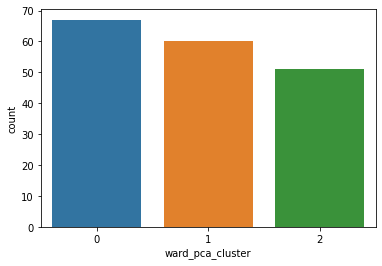

In [62]:
sns.countplot(df['ward_pca_cluster'])

In [64]:
#Checking the optimum No. of Clusters using Elbow plot for PCA Data
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sse.append(km.inertia_)

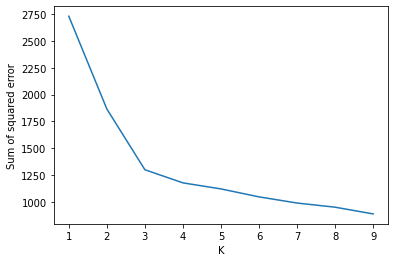

In [65]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [66]:
#Predicting the Clusters
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df_scaled)

In [67]:
df['Km_PCA_cluster']=y_pred

In [68]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ward_cluster,Km_cluster,ward_pca_cluster,Km_PCA_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1,2,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,1,2,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,1,2,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,1,2,0


# Summary
1.   When hierarical Clustering was perfomed on Normalized data it resulted in 3 clusters.
2.   when hierarical Clustering was performed on PCA data it resulted in 4 Clusters.
3.   For K means it resulted in 3 clusters with both scaled and also with PCA Data.


